<a href="https://colab.research.google.com/github/AdiShirsath/Cassava-Leaf-Disease-Detection/blob/main/Approch_1/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Cassava Leaf Disease Detection 3- With ResNet***




Importing required tools

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
%matplotlib inline
%load_ext tensorboard
# To build CNN
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

from keras.applications import ResNet50V2
from tensorflow.keras import regularizers
from keras import Model

***Import data***

In [ ]:
dummy_train = tf.data.experimental.load('/content/drive/MyDrive/ML/Cassava_leaf_disease/data/dummy_train_data',
                                        element_spec=(tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), tf.TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)))
dummy_val = tf.data.experimental.load(path= '/content/drive/MyDrive/ML/Cassava_leaf_disease/data/dummy_val_data',
                                      element_spec=(tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), tf.TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)))

In [ ]:
dummy_train.element_spec, dummy_val.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)))

#### First We will use [ResNet50v2](https://keras.io/api/applications/resnet/#resnet50v2-function) beause has less parameters with good accuracy  

In [ ]:
base_model = ResNet50V2(include_top=False,input_shape=(224,224,3))


*Note*- We will freeze all layers and add our own Fully Connected layer

In [ ]:
for layer in base_model.layers:
 layer.trainable = False


In [ ]:
# To check if all layers are freezed 
for layer in base_model.layers:
  print(f'{layer} --- {layer.trainable}') 

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f95034af990> --- False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f9504ada810> --- False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f9503bc6d10> --- False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f9503bdb2d0> --- False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f94f0228fd0> --- False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f94f022eed0> --- False
<tensorflow.python.keras.layers.core.Activation object at 0x7f94f022e890> --- False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f94f01dd390> --- False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f94f01e4cd0> --- False
<tensorflow.python.keras.layers.core.Activation object at 0x7f94f01e9990> --- False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f

In [ ]:
# now build FC layer

top_model = base_model.output
# Flatten layer
top_model = Flatten()(top_model)
# Dense layers 
top_model = Dense(512,activation='relu')(top_model)
top_model = Dense(512,activation='relu')(top_model)
top_model = Dense(512,activation='relu')(top_model)
top_model = Dense(128,activation='relu')(top_model)

# Output layer
top_model = Dense(5, activation='softmax')(top_model)

In [ ]:
## Build model
res50_model1 = Model(inputs = base_model.input, outputs = top_model )

In [ ]:
res50_model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# this time I'll try diffrent optimizer
optimizer = tf.keras.optimizers.Adadelta(
    learning_rate=0.01, name="Adadelta")
res50_model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
EPOCHS = 100  #@param {type:'slider', min:20, max:100, step:10}
EPOCHS

100

In [ ]:
## Define callbacks
res50_model1_callbacks = [ModelCheckpoint("/content/drive/MyDrive/ML/Cassava_leaf_disease/Callbacks/Checkpoints/Res50_model1"),
                          TensorBoard("/content/drive/MyDrive/ML/Cassava_leaf_disease/Callbacks/Tensorboard/Res50_model1"),
                          EarlyStopping(patience=8, monitor='val_loss', min_delta=0.01)]

In [ ]:
res50_history1 = res50_model1.fit(dummy_train,
                                  epochs=EPOCHS,
                                  validation_data = dummy_val,
                                  callbacks=res50_model1_callbacks)

Epoch 1/100
250/250 [==============================] - 157s 487ms/step - loss: 1.0809 - accuracy: 0.6091 - val_loss: 0.8829 - val_accuracy: 0.6850
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML/Cassava_leaf_disease/Callbacks/Checkpoints/Res50_model1/assets
Epoch 2/100
250/250 [==============================] - 166s 666ms/step - loss: 0.5750 - accuracy: 0.8015 - val_loss: 0.8738 - val_accuracy: 0.6885
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML/Cassava_leaf_disease/Callbacks/Checkpoints/Res50_model1/assets
Epoch 3/100
250/250 [==============================] - 167s 668ms/step - loss: 0.3577 - accuracy: 0.8968 - val_loss: 0.8849 - val_accuracy: 0.6945
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML/Cassava_leaf_disease/Callbacks/Checkpoints/Res50_model1/assets
Epoch 4/100
250/250 [==============================] - 166s 665ms/step - loss: 0.2115 - accuracy: 0.9574 - val_loss: 0.9221 - val_accuracy: 0.7020
INFO:tensorflow:Assets written to: /cont

In [ ]:
res50_model1.save("/content/drive/MyDrive/ML/Cassava_leaf_disease/Models/Res50_model1.h5")

In [ ]:
def plot_curves(history):
    '''
    takes history as input which we get when we fit model
    Plots Loss and Accuracy curves for train and val/test set
    '''

    fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,10),sharex=True)

    ax1.plot(history.history["accuracy"], label=" accuracy")  # beause of label we will be able to give legend to perticular curve
    ax1.plot(history.history["val_accuracy"],label="val accuracy")
    ax1.set(title="Accuracy curve", ylabel="Percentage of correct responses")
    ax1.legend()

    ax2.plot(history.history['loss'], label="Loss") 
    ax2.plot(history.history['val_loss'], label="val loss")      
    ax2.set(title="Loss curve", xlabel="Epochs",ylabel="Percentage of loss")
    ax2.legend()

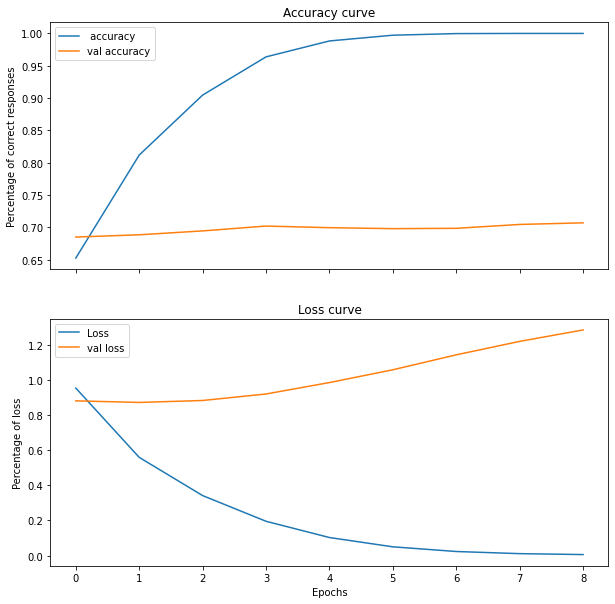

In [ ]:

plot_curves(res50_history1)

***NOTE***- Our Model have low bias but High variance means **Overfitting** thats little bit good because its learning something But we will have to deal with problem of overfitting 
* Use [kenerl regulazier](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/Regularizer) which is regularization techq we will do l2 regularization
* Add dropout layers

In [ ]:
from tensorflow.keras import regularizers 

In [ ]:
# now build new FC layer

top_model2 = base_model.output
# Flatten layer
top_model2 = Flatten()(top_model2)
# Dense layers 
top_model2 = Dense(1024,activation='relu', kernel_regularizer=regularizers.L1(0.03))(top_model2)
top_model2 = Dropout(0.5)(top_model2)
top_model2 = Dense(1024,activation='relu', kernel_regularizer=regularizers.L1(0.03))(top_model2)
top_model2 = Dropout(0.4)(top_model2)
top_model2 = Dense(512,activation='relu', kernel_regularizer=regularizers.L1(0.03))(top_model2)
top_model2 = Dropout(0.3)(top_model2)
top_model2 = Dense(128,activation='relu', kernel_regularizer=regularizers.L1(0.03))(top_model2)

# Output layer
top_model2 = Dense(5, activation='softmax')(top_model2)

In [ ]:
res50_model2 = Model(inputs=base_model.input, outputs = top_model2)
res50_model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
res50_model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
# Define callbacks
res50_model2_callbacks = [ModelCheckpoint("/content/drive/MyDrive/ML/Cassava_leaf_disease/Callbacks/Checkpoints/Res50_model2"),
                          TensorBoard("/content/drive/MyDrive/ML/Cassava_leaf_disease/Callbacks/Tensorboard/Res50_model2"),
                          EarlyStopping(patience=5, monitor='val_loss', min_delta=0.01)]

In [ ]:
res50_history2 = res50_model2.fit(dummy_train,
                                  epochs=EPOCHS,
                                  validation_data=dummy_val,
                                  callbacks=res50_model2_callbacks)

#### Got very bad accuracy and did not improve much after lot epochs to i had to stop training


# ***Fine Tuining***

In [ ]:
base_model = ResNet50V2(include_top=False,input_shape=(224,224,3))



94674944/94668760 [==============================] - 1s 0us/step


In [ ]:
# To check if all layers are freezed 
for layer in base_model.layers:
  print(f'{layer} --- {layer.trainable}') 
  

In [ ]:
# now build new FC layer

top_model3 = base_model.output
# Flatten layer
top_model3 = Flatten()(top_model3)
# Dense layers 
top_model3 = Dense(1024,activation='relu', kernel_regularizer=regularizers.L2(0.001))(top_model3)
top_model3 = Dropout(0.5)(top_model3)
top_model3 = Dense(1024,activation='relu', kernel_regularizer=regularizers.L2(0.001))(top_model3)
top_model3 = Dropout(0.5)(top_model3)
top_model3 = Dense(256,activation='relu', kernel_regularizer=regularizers.L2(0.001))(top_model3)
top_model3 = Dropout(0.3)(top_model3)


# Output layer
top_model3 = Dense(5, activation='softmax')(top_model3)

In [ ]:

res50_model3 = Model(inputs= base_model.input, outputs=top_model3)
res50_model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
res50_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
total_images = 21397
class_weight_0=(1./1087)*(total_images/2)
class_weight_1=(1./2189)*(total_images/2)
class_weight_2=(1./2386)*(total_images/2)
class_weight_3=(1./13158)*(total_images/2)
class_weight_4=(1./2577)*(total_images/2)

class_weights ={0: class_weight_0, 1: class_weight_1, 2: class_weight_2, 3: class_weight_3, 4: class_weight_4,}
class_weights

{0: 9.842226310947561,
 1: 4.887391502969392,
 2: 4.483864207879296,
 3: 0.813079495364037,
 4: 4.151532790065968}

In [ ]:
# Define callbacks
res50_model3_callbacks = [ModelCheckpoint("/content/drive/MyDrive/ML/Cassava_leaf_disease/Callbacks/Checkpoints/Res50_model3"),
                          TensorBoard("/content/drive/MyDrive/ML/Cassava_leaf_disease/Callbacks/Tensorboard/Res50_model3"),
                          EarlyStopping(patience=8, monitor='val_loss', min_delta=0.01)]

In [ ]:
res50_history3 = res50_model3.fit(dummy_train,
                                  epochs=EPOCHS,
                                  validation_data=dummy_val,
                                  callbacks=res50_model3_callbacks,
                                  class_weight = class_weights)

Epoch 1/100
250/250 [==============================] - 238s 802ms/step - loss: 9.5363 - accuracy: 0.3191 - val_loss: 4.1333 - val_accuracy: 0.4830
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML/Cassava_leaf_disease/Callbacks/Checkpoints/Res50_model3/assets
Epoch 2/100
250/250 [==============================] - 206s 822ms/step - loss: 6.2974 - accuracy: 0.3957 - val_loss: 3.6015 - val_accuracy: 0.6300
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML/Cassava_leaf_disease/Callbacks/Checkpoints/Res50_model3/assets
Epoch 3/100
250/250 [==============================] - 235s 939ms/step - loss: 5.6539 - accuracy: 0.3808 - val_loss: 3.2622 - val_accuracy: 0.5540
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML/Cassava_leaf_disease/Callbacks/Checkpoints/Res50_model3/assets
Epoch 4/100
250/250 [==============================] - 209s 822ms/step - loss: 5.4310 - accuracy: 0.4217 - val_loss: 4.0260 - val_accuracy: 0.1030
INFO:tensorflow:Assets written to: /cont